# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    response= requests.get(url)
    if(str(response)=="<Response [200]>"):
        print(f"Processing City {city}")
    else:
        print("City not found skipping")

Beginning Data Retrieval
-----------------------------
Processing City deqing
Processing City jamestown
Processing City mayo
Processing City staraya russa
Processing City kikwit
Processing City coquimbo
City not found skipping
City not found skipping
Processing City bereda
Processing City chuy
Processing City vardo
Processing City arraial do cabo
Processing City songea
Processing City gazanjyk
Processing City cleethorpes
Processing City riviere-au-renard
Processing City chingirlau
Processing City portland
Processing City albany
Processing City rio grande
Processing City santo antonio do ica
Processing City avarua
Processing City rikitea
Processing City mut
Processing City hermanus
Processing City hambantota
Processing City ushuaia
Processing City saint-philippe
Processing City mahebourg
Processing City charters towers
Processing City morondava
City not found skipping
Processing City port alfred
Processing City hobart
Processing City cabatuan
Processing City rtishchevo
City not found sk

Processing City kim
Processing City sorata
Processing City banjar
Processing City presidencia roque saenz pena
Processing City calamar
Processing City te anau
Processing City spirovo
Processing City neiafu
Processing City rayong
Processing City ranfurly
Processing City verkhoyansk
Processing City bardiyah
Processing City provideniya
Processing City pangnirtung
Processing City mizdah
Processing City aykhal
Processing City faya
Processing City shimoda
Processing City the valley
Processing City tommot
Processing City port elizabeth
Processing City carutapera
City not found skipping
Processing City guerrero negro
Processing City sokoto
Processing City havre-saint-pierre
Processing City aksha
Processing City high level
Processing City vestmannaeyjar
Processing City husavik
Processing City corowa
Processing City bengkulu
Processing City sao filipe
Processing City leh
Processing City oriximina
Processing City punta gorda
Processing City sao jose da coroa grande
Processing City nago
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Print one city information
url=f"http://api.openweathermap.org/data/2.5/weather?q=fortuna&appid={weather_api_key}"
response= requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.6,
        "lon": -124.16
    },
    "dt": 1592970051,
    "id": 5563839,
    "main": {
        "feels_like": 286.63,
        "humidity": 93,
        "pressure": 1015,
        "temp": 287.98,
        "temp_max": 288.71,
        "temp_min": 287.15
    },
    "name": "Fortuna",
    "sys": {
        "country": "US",
        "id": 4127,
        "sunrise": 1592916398,
        "sunset": 1592970675,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 8047,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 290,
        "speed": 3.6
    }
}


In [5]:

query_url = url + "appid=" + weather_api_key + "&q=" + city
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json


{'cod': 401,
 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}

In [6]:
#Cretate a dictionary of one city
weather_dict= {"City":"fortuna", "Lat":response["coord"]["lat"],"Lng":response["coord"]["lon"], 
               "Max Temp":response["main"]["temp_max"], "Humidity": response["main"]["humidity"],
               "Cloudiness":response["clouds"]["all"], "Wind Speed": response["wind"]["speed"],
               "Country":response["sys"]["country"], "Date":response["dt"]}
weather_dict

{'City': 'fortuna',
 'Cloudiness': 90,
 'Country': 'US',
 'Date': 1592970051,
 'Humidity': 93,
 'Lat': 40.6,
 'Lng': -124.16,
 'Max Temp': 288.71,
 'Wind Speed': 3.6}

In [7]:
#make empty list to contain the dictioaries of multiple cities
list_cityWeather= []
# Create a for loop to add each city information to the list 
for city in cities:
    url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    response= requests.get(url)
    if(str(response)=="<Response [200]>"):
        response=response.json()
        weather_dict= {"City":city, "Lat":response["coord"]["lat"],"Lng":response["coord"]["lon"], 
               "Max Temp":response["main"]["temp_max"], "Humidity": response["main"]["humidity"],
               "Cloudiness":response["clouds"]["all"], "Wind Speed": response["wind"]["speed"],
               "Country":response["sys"]["country"], "Date":response["dt"]}
        list_cityWeather.append(weather_dict)
#list_cityWeather

In [8]:
# Convert list of dictionaries to a dataframe
df_weather = pd.DataFrame(list_cityWeather)
df_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,deqing,30.54,119.96,303.71,73,99,1.78,CN,1592970035
1,jamestown,42.10,-79.24,290.37,87,90,5.70,US,1592970035
2,mayo,38.89,-76.51,301.15,69,1,2.10,US,1592970035
3,staraya russa,57.99,31.36,289.88,69,0,1.42,RU,1592970035
4,kikwit,-5.04,18.82,293.15,45,0,0.95,CD,1592970035


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
df_weather.describe()
# We can see from max humidity in the describe below that max humidity = 100 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,19.901201,24.931890,293.864187,68.190813,45.531802,3.400830,1.592970e+09
std,33.370071,88.156517,7.972379,22.919613,38.022884,2.287406,6.049070e+01
min,-54.800000,-175.200000,272.150000,1.000000,0.000000,0.260000,1.592970e+09
25%,-7.257500,-53.410000,289.150000,56.000000,4.000000,1.715000,1.592970e+09
50%,23.170000,30.090000,294.820000,74.000000,40.000000,3.005000,1.592970e+09
75%,47.927500,101.685000,300.150000,85.000000,83.750000,4.495000,1.592970e+09
max,78.220000,179.320000,313.470000,100.000000,100.000000,14.900000,1.592970e+09


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
df_weather.to_csv(output_data_file, index=False,)  

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

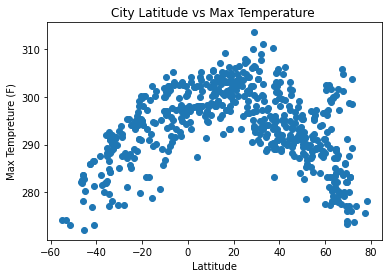

In [11]:
df_lat_Maxtemp= df_weather[["Lat", "Max Temp"]]
plt.scatter(df_lat_Maxtemp["Lat"], df_lat_Maxtemp["Max Temp"])
plt.xlabel("Lattitude")
plt.ylabel("Max Tempreture (F)")
plt.title("City Latitude vs Max Temperature ")
plt.savefig("../output_data/lat_MaxTemp_Global")
plt.show()

## Latitude vs. Humidity Plot

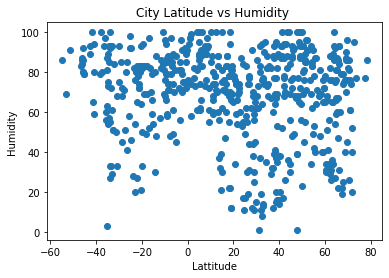

In [12]:
df_lat_humidity= df_weather[["Lat", "Humidity"]]
plt.scatter(df_lat_humidity["Lat"], df_lat_humidity["Humidity"])
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity ")
plt.savefig("../output_data/lat_Humidity_Global")
plt.show()

## Latitude vs. Cloudiness Plot

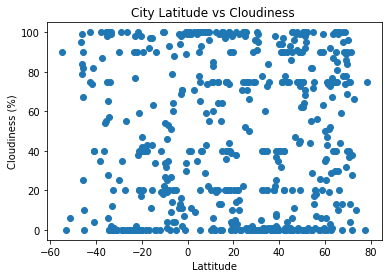

In [13]:
df_lat_Cloudiness= df_weather[["Lat", "Cloudiness"]]
plt.scatter(df_lat_Cloudiness["Lat"], df_lat_Cloudiness["Cloudiness"])
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness ")
plt.savefig("../output_data/lat_Cloudiness_Global")
plt.show()

## Latitude vs. Wind Speed Plot

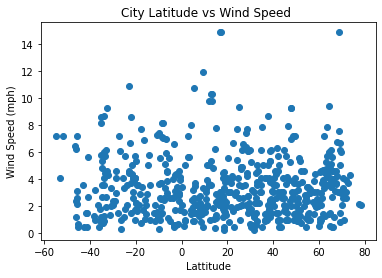

In [14]:
df_lat_WindSpeed= df_weather[["Lat", "Wind Speed"]]
plt.scatter(df_lat_WindSpeed["Lat"], df_lat_WindSpeed["Wind Speed"])
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed ")
plt.savefig("../output_data/lat_WindSpeed_Global")
plt.show()

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def pltLR(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")

In [16]:
# Create Northern and Southern Hemisphere DataFrames
df_Northern = df_weather[df_weather["Lat"]>0]
df_Southern = df_weather[df_weather["Lat"]<0]
df_Northern.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,deqing,30.54,119.96,303.71,73,99,1.78,CN,1592970035
1,jamestown,42.10,-79.24,290.37,87,90,5.70,US,1592970035
2,mayo,38.89,-76.51,301.15,69,1,2.10,US,1592970035
3,staraya russa,57.99,31.36,289.88,69,0,1.42,RU,1592970035
6,bereda,43.27,-7.54,289.82,100,4,0.45,ES,1592970114


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.4255842277182916


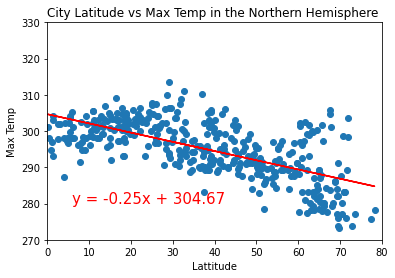

In [17]:
df_lat_MaxTemp= df_Northern[["Lat", "Max Temp"]]
x_values= df_lat_MaxTemp["Lat"]
y_values= df_lat_MaxTemp["Max Temp"]
#plt.scatter(df_lat_MaxTemp["Max Temp"], df_lat_MaxTemp["Lat"])
#pltLR(df_lat_MaxTemp["Max Temp"], df_lat_MaxTemp["Lat"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(0,80)
plt.ylim(270,330)
plt.annotate(line_eq,(6,280),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs Max Temp in the Northern Hemisphere ")
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/lat_MaxTemp_Northern")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5542735911107696


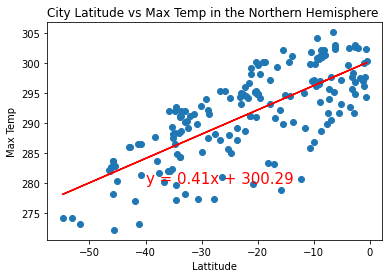

In [18]:
df_lat_MaxTemp= df_Southern[["Lat", "Max Temp"]]
x_values= df_lat_MaxTemp["Lat"]
y_values= df_lat_MaxTemp["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,280),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs Max Temp in the Northern Hemisphere ")
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/lat_MaxTemp_Southern")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.006650697407708002


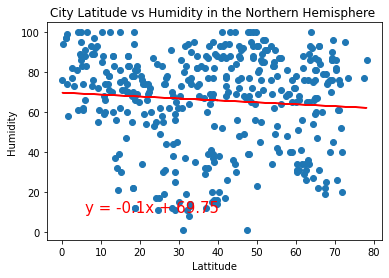

In [19]:
df_lat_Humidity= df_Northern[["Lat", "Humidity"]]
x_values= df_lat_Humidity["Lat"]
y_values= df_lat_Humidity["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity in the Northern Hemisphere ")
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/lat_Humidity_Northern")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.0006247006198058132


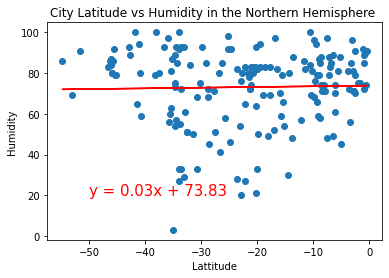

In [20]:
df_lat_Humidity= df_Southern[["Lat", "Humidity"]]
x_values= df_lat_Humidity["Lat"]
y_values= df_lat_Humidity["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity in the Northern Hemisphere ")
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/lat_Humidity_Southern")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 1.5653670264406802e-06


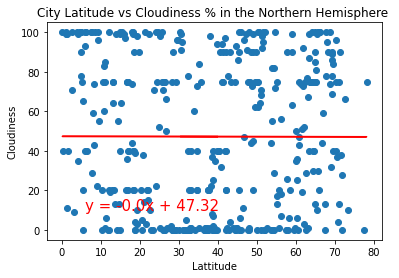

In [21]:
df_lat_Humidity= df_Northern[["Lat", "Cloudiness"]]
x_values= df_lat_Humidity["Lat"]
y_values= df_lat_Humidity["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness % in the Northern Hemisphere ")
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/lat_Cloudiness_Northern")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0059304161627745525


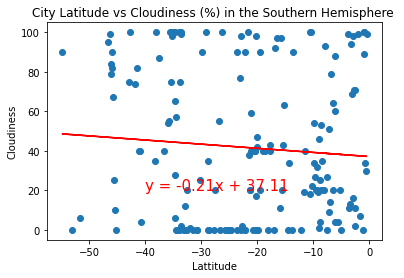

In [22]:
df_lat_Humidity= df_Southern[["Lat", "Cloudiness"]]
x_values= df_lat_Humidity["Lat"]
y_values= df_lat_Humidity["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness (%) in the Southern Hemisphere ")
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/lat_Cloudiness_Southern")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 8.525654455993452e-05


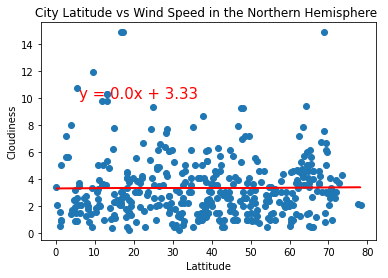

In [23]:
df_lat_WindSpeed= df_Northern[["Lat", "Wind Speed"]]
x_values= df_lat_WindSpeed["Lat"]
y_values= df_lat_WindSpeed["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Wind Speed in the Northern Hemisphere ")
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/lat_WindSpeed_Northern")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0008832791918470196


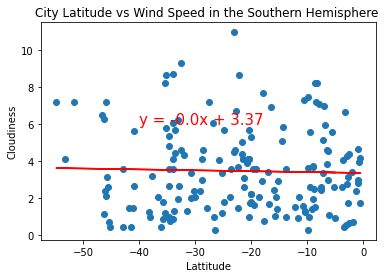

In [24]:
df_lat_WindSpeed= df_Southern[["Lat", "Wind Speed"]]
x_values= df_lat_WindSpeed["Lat"]
y_values= df_lat_WindSpeed["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,6),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Wind Speed in the Southern Hemisphere ")
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/lat_WindSpeed_Southern")
plt.show()